<a href="https://colab.research.google.com/github/xiborxu/IST462xibo/blob/main/FinalExam_IST462_Fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final exam - IST 462 - Notebook

Submitted by:

Date:

Using the SY36 bus route datasets and the 2019 daily weather conditions for Syracuse data perform the data analysis tasks listed in this document. Perform as many tasks and subtasks as needed to get up to 100 points. If the tasks you complete exceed 100 points, and they are all done correctly, your maximum grade will be capped at 100 points.

Each task has a point value for completing it. There are sub-tasks associated with each task that provide additional points. You can complete a sub-task ONLY if you have completed the main task to which it is associated.

To get all the points for a task or sub-task, in addition to performing the required data analysis mentioned in the task/subtask you must also provide clear documentation of the steps you used in the analysis and in all places possible meaningful graphs that show your results.

**Final exam submission:** Submit your exam work in Notebook format (.ipynb file) ***AND*** in PDF format.

#Import packages

You, of course, can and should add more dependent on what you use in your analysis

In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from zipfile import ZipFile
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

# Loading data sets

In [40]:
# connect colab to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2019 Syracuse weather data

In [41]:
import pandas as pd

file = '/content/drive/MyDrive/Final_syracuse_2019_weather.csv'
weather2019 = pd.read_csv(file) #read in the csv file using pandas
weather2019.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/1/2019,15.66,0.02,0.0,40,53,21
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/2/2019,5.14,0.00,0.0,24,31,18
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/3/2019,10.74,0.09,0.3,33,37,30
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/4/2019,4.70,0.00,0.0,36,49,25
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/5/2019,5.59,0.00,0.0,33,44,25


In [42]:
weather2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  365 non-null    object 
 1   NAME     365 non-null    object 
 2   DATE     365 non-null    object 
 3   AWND     365 non-null    float64
 4   PRCP     365 non-null    float64
 5   SNOW     365 non-null    float64
 6   TAVG     365 non-null    int64  
 7   TMAX     365 non-null    int64  
 8   TMIN     365 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 25.8+ KB


## Bus ridership data sets

In [43]:
#Dataframe with bus activity data for 2019 for route SY36
file = '/content/drive/MyDrive/Final_Preprocessed_SY36_2019.csv'
bus_data2019 = pd.read_csv(file) #read in the csv file using pandas
bus_data2019.head()

<ipython-input-43-f3ba1b0c73d7>:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_data2019 = pd.read_csv(file) #read in the csv file using pandas


,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,SURVEY_DATE,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,...,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,WHEELCHAIRS,TIMEPOINT_MILES,FIRST_LAST_STOP,MODIFIED,UNIQUE_ID,stop_lat,stop_lon
0,2604260,295,Sep18 (Holiday),2019-01-01 00:00:00.000000,180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,...,8,0,8,0,0.413,1,1,37100000002,43.043656,-76.150963
1,2604260,295,Sep18 (Holiday),2019-01-01 00:00:00.000000,180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,...,0,0,8,0,NaN,2,0,37100000003,43.044280,-76.147495
2,2604260,295,Sep18 (Holiday),2019-01-01 00:00:00.000000,180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,...,0,0,8,0,0.716,2,1,37100000005,43.045336,-76.147419
3,2604260,295,Sep18 (Holiday),2019-01-01 00:00:00.000000,180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,...,0,0,8,0,NaN,2,0,37100000006,43.047959,-76.147440
4,2604260,295,Sep18 (Holiday),2019-01-01 00:00:00.000000,180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,...,0,0,8,0,NaN,2,0,37100000007,43.049554,-76.148697


In [44]:
bus_data2019.shape

(980551, 47)

In [45]:
#Drop some columns that won't be needed
bus_data2019.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)

In [46]:
bus_data2019.iloc[:100,]

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,NaN,5.483,8,0,8,0.413,1,37100000002,43.043656,-76.150963
1,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000003,43.044280,-76.147495
2,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,2.550,0,0,8,0.716,2,37100000005,43.045336,-76.147419
3,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000006,43.047959,-76.147440
4,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000007,43.049554,-76.148697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2604261,295,Sep18 (Holiday),180900496,371,SY36,TO HUB,[Sy36]Inbound 136 no plazas,2019-01-01 08:15:00.000000,AM Peak,...,0.0,NaN,0,0,5,NaN,2,37100000107,43.041425,-76.265399
96,2604261,295,Sep18 (Holiday),180900496,371,SY36,TO HUB,[Sy36]Inbound 136 no plazas,2019-01-01 08:15:00.000000,AM Peak,...,0.0,NaN,0,0,5,NaN,2,37100000108,43.041470,-76.263683
97,2604261,295,Sep18 (Holiday),180900496,371,SY36,TO HUB,[Sy36]Inbound 136 no plazas,2019-01-01 08:15:00.000000,AM Peak,...,0.0,NaN,0,0,5,NaN,2,37100000109,43.041533,-76.262536
98,2604261,295,Sep18 (Holiday),180900496,371,SY36,TO HUB,[Sy36]Inbound 136 no plazas,2019-01-01 08:15:00.000000,AM Peak,...,0.0,NaN,0,0,5,NaN,2,37100000110,43.041596,-76.261154


In [47]:
bus_data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980551 entries, 0 to 980550
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        980551 non-null  int64  
 1   SCHEDULE_ID          980551 non-null  int64  
 2   SCHEDULE_NAME        980551 non-null  object 
 3   PATTERN_ID           980551 non-null  int64  
 4   ROUTE_NUMBER         980551 non-null  int64  
 5   ROUTE_NAME           980551 non-null  object 
 6   DIRECTION_NAME       980551 non-null  object 
 7   BRANCH               980551 non-null  object 
 8   TRIP_START_TIME      980551 non-null  object 
 9   TIME_PERIOD          980551 non-null  object 
 10  SERVICE_PERIOD       980551 non-null  object 
 11  TRIP_NUMBER          980551 non-null  int64  
 12  TRIP_KEY             980551 non-null  int64  
 13  BLOCK_NUMBER         980551 non-null  int64  
 14  BLOCK_KEY            980551 non-null  int64  
 15  BLOCK_NAME       

In [48]:
#Dataframe with bus activity data for 2020 for route SY36
file = '/content/drive/MyDrive//Preprocessed_SY36_2020.csv'
bus_data2020 = pd.read_csv(file) #read in the csv file using pandas
bus_data2020.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,SURVEY_DATE,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,...,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,WHEELCHAIRS,TIMEPOINT_MILES,FIRST_LAST_STOP,MODIFIED,UNIQUE_ID,stop_lat,stop_lon
0,3286134,314,Dec19 (Holiday),2020-01-01 00:00:00.000000,191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,...,9,0,9,0,0.417,1,1,37100000002,43.043656,-76.150963
1,3286134,314,Dec19 (Holiday),2020-01-01 00:00:00.000000,191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,...,0,0,9,0,NaN,2,0,37100000003,43.044280,-76.147495
2,3286134,314,Dec19 (Holiday),2020-01-01 00:00:00.000000,191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,...,0,0,9,0,0.705,2,1,37100000005,43.045336,-76.147419
3,3286134,314,Dec19 (Holiday),2020-01-01 00:00:00.000000,191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,...,0,0,9,0,NaN,2,0,37100000006,43.047959,-76.147440
4,3286134,314,Dec19 (Holiday),2020-01-01 00:00:00.000000,191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,...,1,0,10,0,NaN,2,0,37100000007,43.049554,-76.148697


In [49]:
#Drop some columns that won't be needed
bus_data2020.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)

In [50]:
bus_data2020.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,NaN,5.533,9,0,9,0.417,1,37100000002,43.043656,-76.150963
1,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000003,43.044280,-76.147495
2,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,4.200,0,0,9,0.705,2,37100000005,43.045336,-76.147419
3,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000006,43.047959,-76.147440
4,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.12,NaN,1,0,10,NaN,2,37100000007,43.049554,-76.148697


In [51]:
bus_data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962566 entries, 0 to 962565
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        962566 non-null  int64  
 1   SCHEDULE_ID          962566 non-null  int64  
 2   SCHEDULE_NAME        962566 non-null  object 
 3   PATTERN_ID           962566 non-null  int64  
 4   ROUTE_NUMBER         962566 non-null  int64  
 5   ROUTE_NAME           962566 non-null  object 
 6   DIRECTION_NAME       962566 non-null  object 
 7   BRANCH               962566 non-null  object 
 8   TRIP_START_TIME      962566 non-null  object 
 9   TIME_PERIOD          962566 non-null  object 
 10  SERVICE_PERIOD       962566 non-null  object 
 11  TRIP_NUMBER          962566 non-null  int64  
 12  TRIP_KEY             962566 non-null  int64  
 13  BLOCK_NUMBER         962566 non-null  int64  
 14  BLOCK_KEY            962566 non-null  int64  
 15  BLOCK_NAME       

# Exam tasks

**Task 1 (30 points):** For the year of 2019 determine the number of passengers that board the bus (PASSENGERS_ON) at a particular STOP_ID per day. Use this data to understand how the changes in weather affect the ridership at your selected Bus Stop. Select a bus stop with a daily annual average of at least 5 passengers using it (This means that for any service day of the year, on average, at least 5 passengers boarded the bus from that bus stop).

In [52]:
# convert the info from TRIP_START_TIME to find the date info
bus_data2019['TRIP_START_TIME'] = pd.to_datetime(bus_data2019['TRIP_START_TIME'])
bus_data2019['DATE'] = bus_data2019['TRIP_START_TIME'].dt.strftime('%m/%d/%Y')
  #create a new column to contain the info
  #I notice I may need to merge the weather data later, so I use same format

In [53]:
# I notice there are a few columns are actually 2020, I want to delete them
mask = bus_data2019['TRIP_START_TIME'].dt.year != 2019
bus_data2019 = bus_data2019[~mask]

In [54]:
# Find the stops with daily average Passengers over 5
  # Group by the STOP_ID and DATE info, find out the daily Passengers number
daily_passenger_counts = bus_data2019.groupby(['STOP_ID', 'DATE'])['PASSENGERS_ON'].sum()
  # Calculate the daily average passenger count for each bus stop
average_passengers = daily_passenger_counts.groupby('STOP_ID').mean()
  # Select the stops with average passengers over 5
populated_bus_stops = average_passengers[average_passengers >= 5]
print(len(populated_bus_stops))
print(populated_bus_stops)

27
STOP_ID
-49         5.625000
 611       13.939726
 612       10.747945
 629       25.435616
 637        5.235616
             ...    
 14615      5.416438
 14616      6.391781
 14645      8.202740
 17661    167.852055
 17677     12.934247
Name: PASSENGERS_ON, Length: 27, dtype: float64


In [55]:
# Now I want to find out the daily passenagers trend
  # I want a subset that only contains the specific STOP info
  # I select 611 here. By info above, its daily average passengers number is 13.93
stop_info = bus_data2019[bus_data2019['STOP_ID'] == 611]
  # Group by the DATE and Passenger number and calculate the sum
daily_passenger_611 = stop_info.groupby('DATE')['PASSENGERS_ON'].sum().reset_index()
daily_passenger_611

,DATE,PASSENGERS_ON
0,01/01/2019,8
1,01/02/2019,15
2,01/03/2019,17
3,01/04/2019,15
4,01/05/2019,12
...,...,...
360,12/27/2019,13
361,12/28/2019,6
362,12/29/2019,5
363,12/30/2019,11


***Subtask 1.1 (+10 points):*** Group the activity at the selected bus stop per month and compare against the average temperature for that month.

In [56]:
#Convert the weather data frame to same format
weather2019['DATE'] = pd.to_datetime(weather2019['DATE'])
weather2019['DATE'] = weather2019['DATE'].dt.strftime('%m/%d/%Y')

In [57]:
# Merge two dataframes
merged_df = pd.merge(daily_passenger_611,weather2019, on='DATE')
merged_df

,DATE,PASSENGERS_ON,STATION,NAME,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,01/01/2019,8,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",15.66,0.02,0.0,40,53,21
1,01/02/2019,15,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",5.14,0.00,0.0,24,31,18
2,01/03/2019,17,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",10.74,0.09,0.3,33,37,30
3,01/04/2019,15,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",4.70,0.00,0.0,36,49,25
4,01/05/2019,12,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",5.59,0.00,0.0,33,44,25
...,...,...,...,...,...,...,...,...,...,...
360,12/27/2019,13,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",10.74,0.00,0.0,47,55,39
361,12/28/2019,6,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",6.71,0.00,0.0,39,42,27
362,12/29/2019,5,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",7.83,0.29,0.0,32,37,25
363,12/30/2019,11,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",12.30,0.75,0.0,37,41,35


In [58]:
# Find the pattern between passengers number of month
  # Create a 'MONTH' column to use as the index for the pivot table
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df['MONTH'] = merged_df['DATE'].dt.strftime('%m')

# Group by month and calculate the sum of 'PASSENGERS_ON' and the mean of 'Average temperature'
monthly_activity = merged_df.groupby('MONTH').agg({
    'PASSENGERS_ON': 'sum',  # Sum the passengers per month
    'TAVG': 'mean'  # Average temperature for the month
}).reset_index()
monthly_activity

,MONTH,PASSENGERS_ON,TAVG
0,01,398,21.677419
1,02,410,26.071429
2,03,487,32.483871
3,04,483,47.866667
4,05,503,56.838710
5,06,354,66.633333
6,07,357,74.741935
7,08,353,69.548387
8,09,454,64.033333
9,10,529,53.451613


***Subtask 1.2 (+10 points):*** Compare the activity between 2 or more bus stops over each month of the year.

In [21]:
# I need a Month column in bus_2019 dataframe
bus_data2019['DATE'] = pd.to_datetime(bus_data2019['DATE'])
bus_data2019['MONTH'] = bus_data2019['DATE'].dt.strftime('%m')

# Filter the data for the bus stops 611,612,and 629
stops_compare = bus_data2019[bus_data2019['STOP_ID'].isin([611, 612, 629])]

# Group the data by 'MONTH' and 'STOP_ID' and calculate the sum for 'PASSENGERS_ON', 'PASSENGERS_OFF', and 'PASSENGERS_IN'
activity_comparison = stops_compare.groupby(['MONTH', 'STOP_ID']).agg({
    'PASSENGERS_ON': 'sum',
    'PASSENGERS_OFF': 'sum',
    'PASSENGERS_IN': 'sum'
}).reset_index()

print(activity_comparison)

   MONTH  STOP_ID  PASSENGERS_ON  PASSENGERS_OFF  PASSENGERS_IN
0     01      611            398              97           6528
1     01      612            295              76           6227
2     01      629            634              97           5984
3     02      611            410              79           6268
4     02      612            304              73           5938
..   ...      ...            ...             ...            ...
31    11      612            298             121           7032
32    11      629            815             128           6787
33    12      611            385              81           7385
34    12      612            363             117           7081
35    12      629            792             158           6792

[36 rows x 5 columns]


***Subtask 1.3 (+10 points):*** Determine the 5 bus stops that provide the highest average number of daily passengers during the year.

In [22]:
# Use the previous series to find out the maximum 5 daily average passengers
stops_df = pd.DataFrame(populated_bus_stops, columns=['PASSENGERS_ON'])

# Find the top 5 stops with the highest number of passengers
top_5_stops = stops_df.nlargest(5, 'PASSENGERS_ON')
print(top_5_stops)

         PASSENGERS_ON
STOP_ID               
17661       167.852055
3761         80.797260
629          25.435616
727          24.432877
1114         22.435616




```
# This is formatted as code
```

**Task 2 (30 points):** For the years of 2019 and 2020, determine the number of passengers that board the bus (PASSENGERS_ON) at a particular STOP_ID per week. Select a bus stop where you would expect a high number of users (i.e. Near a shopping mall, school, hospital, etc) and provide proof of how you found this via bus map, etc. Compare the ridership activity between the two years and state a hypothesis as to why changes could have taken place. Provide evidence to support that your hypothesis is likely true. The evidence could be in the form or newspaper articles, government declarations, etc.

In [23]:
# Generate a DATE info for bus_data2020 with same format
bus_data2020['TRIP_START_TIME'] = pd.to_datetime(bus_data2020['TRIP_START_TIME'])
bus_data2020['DATE'] = bus_data2020['TRIP_START_TIME'].dt.strftime('%m/%d/%Y')
# SO as Month
bus_data2020['DATE'] = pd.to_datetime(bus_data2020['DATE'])
bus_data2020['MONTH'] = bus_data2020['DATE'].dt.strftime('%m')

Bus Station 3761 is at Camillus Commons. (Source: https://www.centro.org/docs/default-source/schedule-documents/auburn-schedules/current-auburn-schedules/aub38.pdf?sfvrsn=5c644e9d_36)
From Google Map, I find Camillus Commons is a business square where there are McDonald, Wendy's Walgreens, Rite Aid, etc., and most importantly, a Walmart there. Also, there is a high school called West Genesee High school is next to it.

In [24]:
# Create a new column "WEEK_NUMBER" to analysis
bus_data2019['WEEK_NUMBER'] = bus_data2019['DATE'].dt.isocalendar().week
bus_data2020['WEEK_NUMBER'] = bus_data2020['DATE'].dt.isocalendar().week

# Select the info about STOP 3761 to run the analysis
stop_3761_data_2019 = bus_data2019[bus_data2019['STOP_ID'] == 3761]
stop_3761_data_2020 = bus_data2020[bus_data2020['STOP_ID'] == 3761]

#Gouping the data by week number and find the sum of passengers number
stop_2019 = stop_3761_data_2019.groupby('WEEK_NUMBER')['PASSENGERS_ON'].sum()
stop_2020 = stop_3761_data_2020.groupby('WEEK_NUMBER')['PASSENGERS_ON'].sum()
# merge two dataframe together and find out the difference between 2019 and 2020
stop_merged = pd.merge(stop_2019,stop_2020, on = 'WEEK_NUMBER')
stop_merged['Difference'] = stop_merged.apply(lambda x: x['PASSENGERS_ON_y'] - x['PASSENGERS_ON_x'], axis=1)
  # create a lambda function to find out the difference between years
stop_merged.columns = ['2019', '2020', 'Difference']
print(stop_merged)
print(stop_merged['Difference'].nlargest(5))
print(stop_merged['Difference'].nsmallest(5))

             2019  2020  Difference
WEEK_NUMBER                        
1             666   422        -244
2             528   483         -45
3             503   498          -5
4             493   625         132
5             557   560           3
...           ...   ...         ...
48            556   494         -62
49            646   648           2
50            643   652           9
51            561   584          23
52            570   525         -45

[52 rows x 3 columns]
WEEK_NUMBER
6     154
4     132
25     96
35     95
11     93
Name: Difference, dtype: int64
WEEK_NUMBER
16   -495
19   -274
17   -267
14   -264
18   -259
Name: Difference, dtype: int64


The results show that beginning from March, the paseenegers number decreases a lot. This is largely becasue of the COVID that shutdown the social operation. For example, the public school is shutdown including West Genesee High school.I find a source from government webiste by that time: https://www.governor.ny.gov/news/governor-cuomo-signs-executive-order-closing-schools-statewide-two-weeks#:~:text=Governor%20Andrew%20M.,the%20180%2Dday%20instructional%20requirement announcing the shutdown of all public school in New York State.

In [25]:
bus_data2019.columns

Index(['SERIAL_NUMBER', 'SCHEDULE_ID', 'SCHEDULE_NAME', 'PATTERN_ID',
       'ROUTE_NUMBER', 'ROUTE_NAME', 'DIRECTION_NAME', 'BRANCH',
       'TRIP_START_TIME', 'TIME_PERIOD', 'SERVICE_PERIOD', 'TRIP_NUMBER',
       'TRIP_KEY', 'BLOCK_NUMBER', 'BLOCK_KEY', 'BLOCK_NAME', 'RUN_NUMBER',
       'RUN_KEY', 'VEHICLE_NUMBER', 'VEHICLE_SEATS', 'OPERATOR_ID',
       'SORT_ORDER', 'STOP_ID', 'MAIN_CROSS_STREET', 'TRAVEL_DIRECTION',
       'TIMEPOINT', 'SEGMENT_MILES', 'TIME_SCHEDULED', 'TIME_ACTUAL_ARRIVE',
       'TIME_ACTUAL_DEPART', 'DWELL_TIME', 'RUNNING_TIME_ACTUAL',
       'PASSENGERS_ON', 'PASSENGERS_OFF', 'PASSENGERS_IN', 'TIMEPOINT_MILES',
       'FIRST_LAST_STOP', 'UNIQUE_ID', 'stop_lat', 'stop_lon', 'DATE', 'MONTH',
       'WEEK_NUMBER'],
      dtype='object')

***Subtast 2.1 (+10 points):*** Determine the 10 bus stops that provide the highest average number of weekly passengers for each year. Provide a brief comment on any differences that you find interesting.

In [26]:
# Group the dataframe by 'STOP_ID' and 'WEEK_NUMBER' and calculate the average number of weekly passengers
stop_average_passengers = bus_data2019.groupby(['STOP_ID', 'WEEK_NUMBER'])['PASSENGERS_ON'].mean().reset_index()
# sort the dataframe by PASSENGER numbers in a descending order
stop_average_passengers = stop_average_passengers.sort_values(by='PASSENGERS_ON', ascending=False)
# Pick top 10 values
top_10_stops = stop_average_passengers.head(10)
print(top_10_stops)

      STOP_ID  WEEK_NUMBER  PASSENGERS_ON
8142    17661           40       6.774336
8139    17661           37       6.690265
8138    17661           36       6.556701
8140    17661           38       6.474654
8137    17661           35       6.340807
8151    17661           49       6.321951
8143    17661           41       6.297778
8134    17661           32       6.280952
8147    17661           45       6.251185
8112    17661           10       6.158163


In [27]:
# Same process for year of 2020
stop_average_passengers = bus_data2020.groupby(['STOP_ID', 'WEEK_NUMBER'])['PASSENGERS_ON'].mean().reset_index()
stop_average_passengers = stop_average_passengers.sort_values(by='PASSENGERS_ON', ascending=False)
top_10_stops = stop_average_passengers.head(10)
print(top_10_stops)

      STOP_ID  WEEK_NUMBER  PASSENGERS_ON
8234    17661            1       6.823529
8257    17661           24       6.532258
8256    17661           23       6.429752
8239    17661            6       6.105263
8255    17661           22       5.939655
8243    17661           10       5.833333
8253    17661           20       5.784000
8235    17661            2       5.654255
8242    17661            9       5.650718
8236    17661            3       5.527778


**Task 3 (20 points):** For both the years 2019 and 2020, compute the distance traveled by the buses serving the route per day. Use the data in the SEGMENT_MILES column for this purpose.

In [28]:
# Grouping the DATE and calculate the sum of segment miles, which will give the daily segent miles number
daily_distance_2019 = bus_data2019.groupby('DATE')['SEGMENT_MILES'].sum().reset_index()
print(daily_distance_2019)

          DATE  SEGMENT_MILES
0   2019-01-01        136.345
1   2019-01-02        421.777
2   2019-01-03        359.504
3   2019-01-04        356.709
4   2019-01-05        169.325
..         ...            ...
360 2019-12-27        441.765
361 2019-12-28        148.107
362 2019-12-29        156.543
363 2019-12-30        429.142
364 2019-12-31        498.647

[365 rows x 2 columns]


In [29]:
daily_distance_2020 = bus_data2020.groupby('DATE')['SEGMENT_MILES'].sum().reset_index()
print(daily_distance_2020)

          DATE  SEGMENT_MILES
0   2020-01-01        156.543
1   2020-01-02        443.359
2   2020-01-03        388.309
3   2020-01-04        120.234
4   2020-01-05        123.609
..         ...            ...
354 2020-12-28        516.567
355 2020-12-29        541.887
356 2020-12-30        535.750
357 2020-12-31        541.887
358 2021-01-01          8.363

[359 rows x 2 columns]


***Subtask 3.1 (+10 points):*** Break down the miles travelled by the buses per month. Assuming an efficiency of 7 miles per gallon and a price of US $3.60 per gallow, compute how much it costs to run the buses per month if they use diesel fuel.

In [30]:
# Group the data by Month and calcluate the sum of Segment miles, which gives the values of monthly travel distance
monthly_cost_2019 = bus_data2019.groupby('MONTH')['SEGMENT_MILES'].sum().reset_index()
# lambda function to run the maths to finds the price; add the price to the dataframe
monthly_cost_2019['prices'] = monthly_cost_2019.apply(lambda x: f"${x['SEGMENT_MILES'] / 7 * 3.60:.2f}", axis=1)
print(monthly_cost_2019)

monthly_cost_2020 = bus_data2020.groupby('MONTH')['SEGMENT_MILES'].sum().reset_index()
monthly_cost_2020['prices'] = monthly_cost_2020.apply(lambda x: f"${x['SEGMENT_MILES'] / 7 * 3.60:.2f}", axis=1)
print(monthly_cost_2020)

   MONTH  SEGMENT_MILES    prices
0     01      10105.073  $5196.89
1     02       9499.841  $4885.63
2     03      10681.470  $5493.33
3     04      11165.910  $5742.47
4     05      10966.325  $5639.82
5     06      10159.575  $5224.92
6     07      11277.789  $5800.01
7     08      11583.463  $5957.21
8     09      10722.613  $5514.49
9     10      11687.901  $6010.92
10    11      10238.780  $5265.66
11    12      10833.089  $5571.30
   MONTH  SEGMENT_MILES    prices
0     01      10851.691  $5580.87
1     02      10360.633  $5328.33
2     03       9892.461  $5087.55
3     04       6403.369  $3293.16
4     05       6085.023  $3129.44
5     06       9142.423  $4701.82
6     07      12928.088  $6648.73
7     08      12781.352  $6573.27
8     09      12144.613  $6245.80
9     10      12959.354  $6664.81
10    11      12462.739  $6409.41
11    12      13249.479  $6814.02


***Subtast 3.2 (+10 points):*** Determine if there are any anomalies (outliers) in the values of the daily distance travelled by the bus each year. Give a possible hypothesis for why they may have occurred and provide evicence to support your hypothesis such as an article or government declaration, etc.

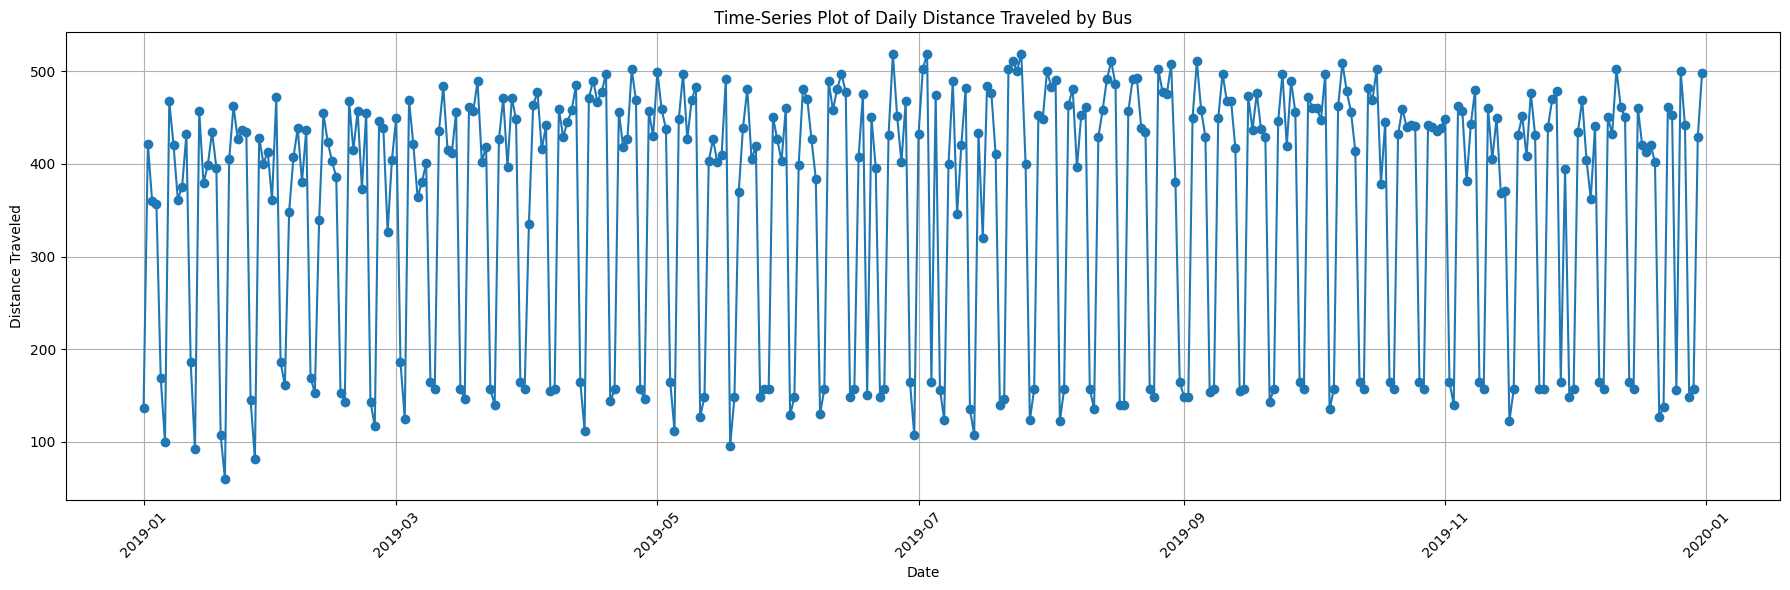

In [31]:
# to find out the outliers, I draw a time series graph to locate potential outliers.
plt.figure(figsize=(18, 6))
plt.plot(daily_distance_2019['DATE'], daily_distance_2019['SEGMENT_MILES'], marker='o', linestyle='-')
plt.title('Time-Series Plot of Daily Distance Traveled by Bus')
plt.xlabel('Date')
plt.ylabel('Distance Traveled')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# I did not find any outlier in this graph for 2019

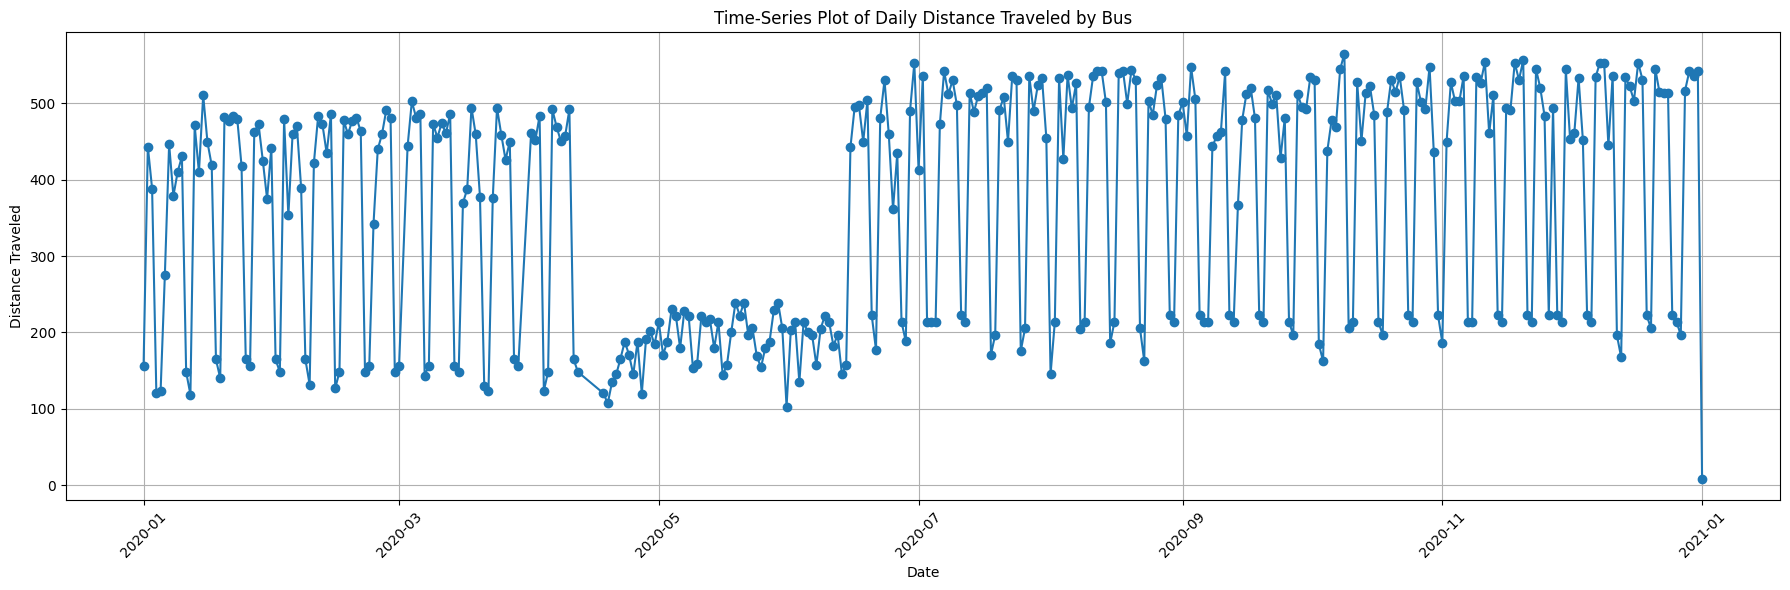

In [32]:
plt.figure(figsize=(18, 6))
plt.plot(daily_distance_2020['DATE'], daily_distance_2020['SEGMENT_MILES'], marker='o', linestyle='-')
plt.title('Time-Series Plot of Daily Distance Traveled by Bus')
plt.xlabel('Date')
plt.ylabel('Distance Traveled')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In this graph, from 2020 Mid-April to Mid-June, I see a significant decrease at the distance traveled by bus. The time matched the that of COVID so I guess COVID had something to do with it.
I find this website: https://www.syracuse.com/coronavirus/2020/04/centro-bus-routes-reduced-amid-concerns-over-coronavirus.html talking about the centro bus routes reduced during those time because of COVID. This explains the reduction on the bus

**Task 4 (20 points):** For both years 2019 and 2020, study the differences between the time of arrival (TIME_ACTUAL_ARRIVE) and the scheduled bus time (TIME_SCHEDULED) to determine the hours of the day, or the weeks of the year (or some other time period) where significant deviations between the arrival time and the scheduled time appear. Deviations of more than 10 minutes can be considered significant but you can change this limit if it makes sense for your analysis.

In [33]:
bus_data2019['TIME_ACTUAL_ARRIVE'] = pd.to_datetime(bus_data2019['TIME_ACTUAL_ARRIVE'])
bus_data2019['TIME_SCHEDULED'] = pd.to_datetime(bus_data2019['TIME_SCHEDULED'])
# Calculate the time differences in minutes, and save the values to a new column
bus_data2019['Time_Difference'] = (bus_data2019['TIME_ACTUAL_ARRIVE'] - bus_data2019['TIME_SCHEDULED']).dt.total_seconds() / 60
# Create a new column to identify the hour of the day
bus_data2019['Hour_of_Day'] = bus_data2019['TIME_ACTUAL_ARRIVE'].dt.hour
# Group by the hour of the dat and find out the mean of time difference
hour_time_difference_2019 = bus_data2019.groupby('Hour_of_Day')['Time_Difference'].mean()
hour_time_difference_2019 = pd.DataFrame({'Time Difference': hour_time_difference_2019})
# Set the condition (over 10 mins)
major_difference_hours_2019 = hour_time_difference_2019[(hour_time_difference_2019['Time Difference'] > 10) | (hour_time_difference_2019['Time Difference']< -10)]
major_difference_hours_2019

,Time Difference
Hour_of_Day,
0,271.253317
4,-81.775881
5,-10.140606
7,12.865509
15,10.306280


I believe there should be some mistakes in this graph since the significant amounts of time different appear on some unusual time like 0 and 4 with a huge difference. It probably should be because of the wrong schedule time. The rest of three time indicate the right time. 7 and 15 should be because of the rush hours.

In [34]:
bus_data2020['TIME_ACTUAL_ARRIVE'] = pd.to_datetime(bus_data2020['TIME_ACTUAL_ARRIVE'])
bus_data2020['TIME_SCHEDULED'] = pd.to_datetime(bus_data2020['TIME_SCHEDULED'])

# Calculate the time differences in minutes
bus_data2020['Time_Difference'] = (bus_data2020['TIME_ACTUAL_ARRIVE'] - bus_data2020['TIME_SCHEDULED']).dt.total_seconds() / 60
bus_data2020['Hour_of_Day'] = bus_data2020['TIME_ACTUAL_ARRIVE'].dt.hour
hour_time_difference_2020 = bus_data2020.groupby('Hour_of_Day')['Time_Difference'].mean()
hour_time_difference_2020 = pd.DataFrame({'Time Difference': hour_time_difference_2020})
major_difference_hours_2020 = hour_time_difference_2020[(hour_time_difference_2020['Time Difference'] > 10) | (hour_time_difference_2020['Time Difference']< -10)]
major_difference_hours_2020

,Time Difference
Hour_of_Day,
0,298.275911


I believe the same thing, wrong schedule time here to make this happen.

***Subtask 4.1 (+10 points):*** For 2019 only investigate if there is any relationship between weather conditions (termperature, wind, snow) with the deviations between time of arrival and scheduled bust time. Justify your analysis with graphs and documentation.

In [35]:
# Merge the weather and bus info data together
weather2019['DATE'] = pd.to_datetime(weather2019['DATE'])
merged_2019 = pd.merge(weather2019, bus_data2019, on = 'DATE')
# group by the DATE and find out the mean of AWND, PRCP,SNOW and TAVG.
weather_difference = merged_2019.groupby('DATE')[['AWND','PRCP','SNOW','TAVG','Time_Difference']].mean().reset_index()
weather_difference

,DATE,AWND,PRCP,SNOW,TAVG,Time_Difference
0,2019-01-01,15.66,0.02,0.0,40.0,0.395016
1,2019-01-02,5.14,0.00,0.0,24.0,10.992732
2,2019-01-03,10.74,0.09,0.3,33.0,13.348897
3,2019-01-04,4.70,0.00,0.0,36.0,13.564738
4,2019-01-05,5.59,0.00,0.0,33.0,1.607778
...,...,...,...,...,...,...
360,2019-12-27,10.74,0.00,0.0,47.0,9.500960
361,2019-12-28,6.71,0.00,0.0,39.0,2.132311
362,2019-12-29,7.83,0.29,0.0,32.0,-0.147487
363,2019-12-30,12.30,0.75,0.0,37.0,9.603222


In [36]:
corr = weather_difference.corr()
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-36-6afbaaa24d55>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = weather_difference.corr()


,AWND,PRCP,SNOW,TAVG,Time_Difference
AWND,1.000000,0.064321,0.287448,-0.276305,-0.058810
PRCP,0.064321,1.000000,0.172122,0.120430,-0.018129
SNOW,0.287448,0.172122,1.000000,-0.387230,-0.003055
TAVG,-0.276305,0.120430,-0.387230,1.000000,0.037209
Time_Difference,-0.058810,-0.018129,-0.003055,0.037209,1.000000


From the correlation graph, the time difference has a higher relationship with average wind speed and average temperature.

***Subtask 4.2 (+10 points):*** Investigate if the VEHICLE_NUMBER or OPERATOR_ID have an influence in the deviations between time of arrival and scheduled bus time. Justify your analysis with graphs and documentation.

In [37]:
#merged_2019.head()
# same process as above, group by the Vehicle number and find the mean of time difference
veh_num_difference = merged_2019.groupby('VEHICLE_NUMBER')['Time_Difference'].mean()

# the output is a series but I need a dataframe for graph. Convert it to a df
veh_num_difference = veh_num_difference.reset_index()
veh_num_difference.columns = ['Vehicle Number', 'Time Difference']
# draw the relationship graph
corr = veh_num_difference.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Vehicle Number,Time Difference
Vehicle Number,1.000000,-0.449815
Time Difference,-0.449815,1.000000


From the correlation graph, the relationship between vehcile number and time difference is only -0.45,which is not a high correlation.

In [38]:
# same process for the operation ID
oper_id_difference = merged_2019.groupby('OPERATOR_ID')['Time_Difference'].mean()
oper_id_difference = oper_id_difference.reset_index()
oper_id_difference.columns = ['Operation ID', 'Time Difference']

corr = oper_id_difference.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Operation ID,Time Difference
Operation ID,1.000000,0.055624
Time Difference,0.055624,1.000000


The correlation is 0.056, which has a strong correlation between the time difference and operation ID.